# GemGIS WMS Layers

This notebooks presents the different functions of GemGIS that are available for WMS Services.

**What is a Web Map Service?** <br>
A Web Map Service (WMS) is a standard protocol developed by the Open Geospatial Consortium in 1999 for serving georeferenced map images over the Internet. These images are typically produced by a map server from data provided by a GIS database. (https://en.wikipedia.org/wiki/Web_Map_Service)

WMS defines a standard method of publishing capabilities to the web and furnishing images of requested areas. A WMS client first asks what layers are available, in what formats, styles, and projections. Some decisions are made depending on need and availability. These decisions along with a specific bounding box are sent back to the WMS server. The WMS server builds the requested image and returns it as a rectangular png, jpeg, tiff etc. Behind the WMS server is some type of data repository, either vector data or imagery, but the WMS server handles all requests for specific parts of this data resource. (http://www.web-maps.com/gisblog/?cat=19)

<img src="data/images/img1.jpg" width=500>

# Contents

- Importing Libraries
- Create Map
- Working with WMS Layers

# Importing Libraries

In [1]:
import sys
sys.path.append('../../gemgis')

import gemgis as gg

print(gg)

<module 'gemgis' from '../../gemgis\\gemgis\\__init__.py'>


# Create Map

In [2]:
m = gg.Map()

In [3]:
m

Map(center=[50.779305, 6.078914], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', …

# Working with WMS Layers

## Adding WMS Layer to the Map

The function ```m.WMSLayer``` automatically adds a default WMS layer to the map. Custom WMS services can be specified as shown below. However, no further processing can be done. Instead, a subset of the WMS Layer with a specific extent has to be obtained as explained below.

In [4]:
wms1 = m.load_wms()

In [5]:
wms2 = m.load_wms(url='https://ows.terrestris.de/osm/service?',
                      layers='SRTM30-Hillshade',
                      format='image/png',
                      transparent=True,
                      size = (2000,2000),
                      attribution='',
                      name = 'SRTM30-Hillshade')

In [6]:
m.add_layer(wms1)

In [7]:
m.add_layer(wms2)

In [8]:
m

Map(center=[50.779305, 6.078914], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', …

## Add Subset of WMS Layer

In order to work with WMS and create a subset of a WMS layer, a WMS object has to be created by providing the URL of the WMS Service.

In [9]:
wms = gg.data.WMS(url = 'https://ows.terrestris.de/osm/service?')

### Layer Attributes

The WMS object was loaded with OSWLib. More information on OWSLib [here](https://geopython.github.io/OWSLib/).

#### WMS Object

In [10]:
wms.object

#### WMS URL

In [11]:
wms.url

'https://ows.terrestris.de/osm/service?'

#### WMS Type

In [12]:
wms.type

'OGC:WMS'

#### WMS Version

In [13]:
wms.version

'1.1.1'

#### WMS Title

In [14]:
wms.title

'OpenStreetMap WMS'

#### WMS Abstract

In [15]:
wms.abstract

'OpenStreetMap WMS, bereitgestellt durch terrestris GmbH und Co. KG. Beschleunigt mit MapProxy (http://mapproxy.org/)'

#### WMS Contents/Layers

In [16]:
wms.contents

['OSM-WMS',
 'OSM-Overlay-WMS',
 'TOPO-WMS',
 'TOPO-OSM-WMS',
 'SRTM30-Hillshade',
 'SRTM30-Colored',
 'SRTM30-Colored-Hillshade',
 'SRTM30-Contour']

#### WMS Layer Title

In [17]:
wms[wms.contents[0]].title

'OpenStreetMap WMS - by terrestris'

In [18]:
wms['OSM-WMS'].title

'OpenStreetMap WMS - by terrestris'

#### WMS Layer Styles

In [19]:
wms['OSM-WMS'].styles

{'default': {'title': 'default',
  'legend': 'http://ows.terrestris.de/osm/service?styles=&layer=OSM-WMS&service=WMS&format=image%2Fpng&sld_version=1.1.0&request=GetLegendGraphic&version=1.1.1'}}

#### WMS Layer Operations

In [20]:
[op.name for op in wms.operations]

['GetCapabilities', 'GetMap', 'GetFeatureInfo', 'GetLegendGraphic']

#### WMS Layer Operation Methods

In [21]:
wms.getOperationByName('GetMap').methods

[{'type': 'Get', 'url': 'http://ows.terrestris.de/osm/service?'}]

#### WMS Layer Format Options

In [22]:
wms.getOperationByName('GetMap').formatOptions

['image/jpeg', 'image/png']

#### WMS Layer Opaque

In [23]:
wms['OSM-WMS'].opaque

0

#### WMS Layer Bounding Box

In [24]:
wms['OSM-WMS'].boundingBox

(-20037508.3428, -25819498.5135, 20037508.3428, 25819498.5135, 'EPSG:900913')

#### WMS Layer Bounding Box WGS 84

In [25]:
wms['OSM-WMS'].boundingBoxWGS84

(-180.0, -88.0, 180.0, 88.0)

#### WMS Layer CRS Options

In [26]:
wms['OSM-WMS'].crsOptions

['EPSG:4326',
 'EPSG:3035',
 'EPSG:32648',
 'EPSG:2056',
 'EPSG:4647',
 'EPSG:3068',
 'EPSG:25832',
 'EPSG:31467',
 'EPSG:29192',
 'EPSG:900913',
 'EPSG:31463',
 'EPSG:5243',
 'EPSG:3034',
 'EPSG:31468',
 'EPSG:29193',
 'EPSG:21781',
 'EPSG:31466',
 'EPSG:4839',
 'EPSG:2180',
 'EPSG:4686',
 'EPSG:4258',
 'EPSG:2100',
 'EPSG:3857',
 'EPSG:25833',
 'EPSG:4674']

### Load Subset to Map

The function ```wms.getmap()``` is obtaining a subset of a WMS layer and crops it to a given extend. This layer can then be added with ```m.add_layer()``` as ipyleaflet ImageOverlay. 

In [27]:
img1 = wms.getmap()

Layer: ['OSM-WMS']
Style: ['default']


In [28]:
img2 = wms.getmap(layer = 'TOPO-WMS', crs = 'EPSG:4326', extent = (5, 49, 10, 52), styles = None)

Layer: ['TOPO-WMS']
Style: None


In [29]:
img3 = wms.getmap(layer = 'SRTM30-Colored', crs = 'EPSG:4647', extent = (32207462.87, 5435168.33, 32568649.70, 5761510.32), styles = None)

Layer: ['SRTM30-Colored']
Style: None


In [30]:
print(img1)

ImageOverlay(bounds=[(49, 5), (52, 10)], name='WMS Layer', options=['attribution'], url='WMS Layer.png')


In [31]:
print(img2)

ImageOverlay(bounds=[(49, 5), (52, 10)], name='TOPO-WMS', options=['attribution'], url='TOPO-WMS.png')


In [32]:
print(img3)

ImageOverlay(bounds=[(48.99999997259596, 5.000000061711315), (52.000000032684945, 9.9999999294099)], name='SRTM30-Colored', options=['attribution'], url='SRTM30-Colored.png')


In [33]:
m.add_layer(img1)

In [34]:
m.add_layer(img2)

In [35]:
m.add_layer(img3)

In [36]:
m.zoom = 6
m

Map(center=[50.779305, 6.078914], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', …

### Convert Subset to Array for future use

In [37]:
array = wms.convert_map_to_array(layer = 'TOPO-WMS', extent = (5, 49, 10, 52), format = 'tiff')

Layer: ['TOPO-WMS']
Style: ['default']


In [38]:
print(array.shape)
array

(2000, 2000, 4)


array([[[ 26, 152,  80, 255],
        [ 26, 152,  80, 255],
        [ 26, 152,  80, 255],
        ...,
        [173, 218, 114, 255],
        [173, 218, 114, 255],
        [173, 218, 114, 255]],

       [[ 26, 152,  80, 255],
        [ 26, 152,  80, 255],
        [ 26, 152,  80, 255],
        ...,
        [179, 219, 121, 255],
        [179, 219, 121, 255],
        [179, 219, 121, 255]],

       [[ 26, 152,  80, 255],
        [ 26, 152,  80, 255],
        [ 26, 152,  80, 255],
        ...,
        [179, 219, 121, 255],
        [179, 219, 121, 255],
        [179, 219, 121, 255]],

       ...,

       [[165, 216, 106, 255],
        [165, 216, 106, 255],
        [165, 216, 106, 255],
        ...,
        [233, 229, 180, 255],
        [233, 229, 180, 255],
        [242, 227, 187, 255]],

       [[165, 216, 106, 255],
        [165, 216, 106, 255],
        [165, 216, 106, 255],
        ...,
        [233, 229, 180, 255],
        [233, 229, 180, 255],
        [233, 229, 180, 255]],

       [[165

### Save Array as Raster

In [39]:
wms.save_as_tiff(array, 'data/test_raster.tiff', show_image = False)

File saved successfully


### Plot Array/Raster

In order to plot an array, we are using another class, the ```Raster()```class. The raster can either be loaded as array or from a local file. More on raster data manipulation in the next Notebook.

In [40]:
raster = gg.data.Raster(path = 'data/test_raster.tiff')

C:\Users\alexa\Anaconda3\lib\site-packages\rasterio\__init__.py:219: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [41]:
raster_1 = raster.load_band_as_array(1)

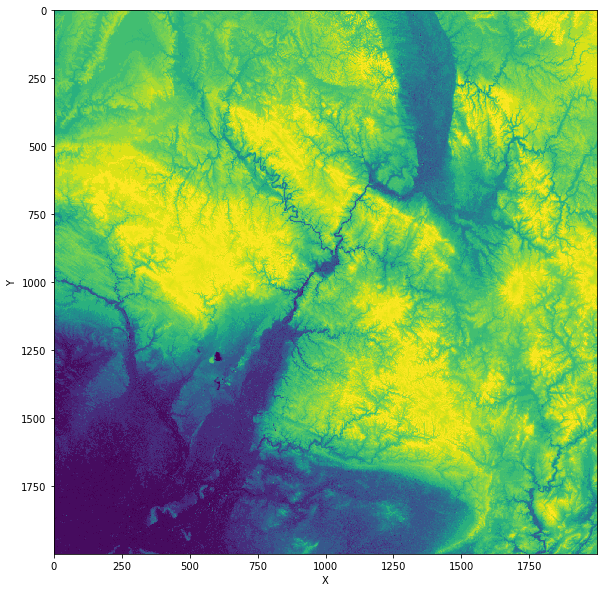

In [42]:
raster.plot_raster(raster_1)

### Plot Raster with Coordinates

If an extent is provided, the raster will be plotted at its true coordinates. Provide coordinates for ```(left, right, bottom, top)```.

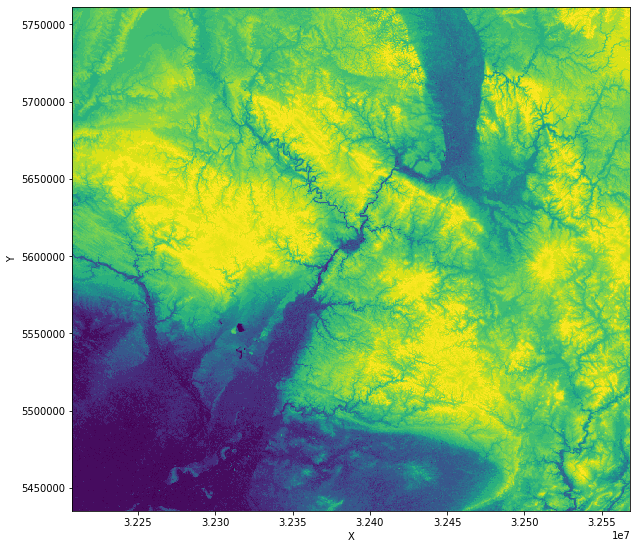

In [43]:
raster.plot_raster(raster_1, origin = 'lower', extent = (32207462.87, 32568649.70, 5435168.33, 5761510.32))